# Environment Setting

In [3]:
!pip install numpy
!pip install matplotlib
!pip install scipy

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from book.dataset.mnist import load_mnist

# 1. Perceptron

In [5]:
def AND(x1, x2):

  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7

  tmp = np.sum(x*w) + b

  if tmp <= 0:
    return 0

  else:
    return 1


def NAND(x1, x2):

  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7

  tmp = np.sum(x*w) + b

  if tmp <= 0:
    return 0

  else:
    return 1


def OR(x1, x2):

  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2

  tmp = np.sum(x*w) + b

  if tmp <= 0:
    return 0

  else:
    return 1

In [6]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)

  return y

In [7]:
print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


# 2. Neural Network

## Activation Function

In [32]:
def step_function(x):
  return np.array(x>0, dtype=np.int64)


def sigmoid(x):
  return 1 / (1 + np.exp(-x))


def relu(x):
  return np.maximum(0,x)


def identity_function(x):
  return x


def softmax(x):
  exp_x = np.exp(x)
  sum_exp_x = np.sum(exp_x)
  y = exp_x / sum_exp_x

  return y

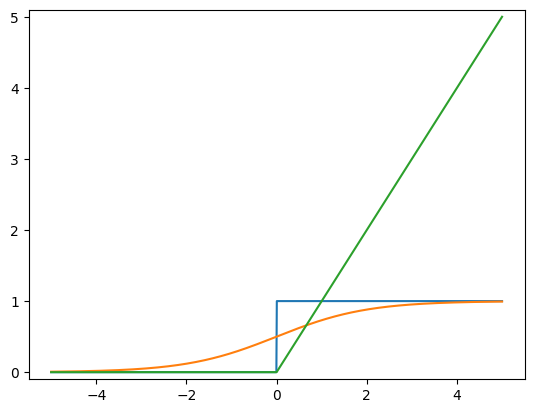

In [30]:
x = np.linspace(-5,5,1000)
y1 = step_function(x)
y2 = sigmoid(x)
y3 = relu(x)

plt.plot(x, y1, label="step function")
plt.plot(x, y2, label="sigmoid function")
plt.plot(x, y3, label="relu function")
plt.ylim(-0.1, 5.1)
plt.show()

In [33]:
a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

## Three Layer Neural Net

In [26]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.2], [0.3, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

In [27]:
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.matmul(W1, x) + b1
  z1 = sigmoid(a1)

  a2 = np.matmul(W2, z1) + b2
  z2 = sigmoid(a2)

  a3 = np.matmul(W3, z2) + b3

  return a3

In [28]:
forward(init_network(), np.array([1, 0.5]))

array([0.31682708, 0.69627909])

## MNIST Practice